## Bayes Analysis (Wine Quality Analysis)

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [102]:
df=pd.read_csv("Dataset.csv")
df.head(5)

,id,name,fixed acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,type,Taste,quality
0,1.0,Chardonnay,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Port,Balanced,1
1,2.0,Cabernet Sauvignon,7.8,0.00,2.6,0.098,67.0,0.9968,0.68,9.8,White,Sour,0
2,3.0,Merlot,7.8,0.04,2.3,0.092,54.0,0.9970,0.65,9.8,Rose,Earthy,0
3,4.0,Pinot Noir,11.2,0.56,1.9,0.075,60.0,0.9980,0.58,9.8,White,Bitter,1
4,5.0,Zinfandel,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Rose,Balanced,1


In [103]:
df.dtypes

id                      float64
name                     object
fixed acidity           float64
citric acid             float64
residual sugar          float64
chlorides               float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
alcohol                 float64
type                     object
Taste                    object
quality                   int64
dtype: object

## Removing Irrelevant Columns

### Removing columns like "id" and "name" as they are not relevent to our analysis.

In [104]:
df=df.drop(['id','name'],axis=1)
df.head(5)

,fixed acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,type,Taste,quality
0,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Port,Balanced,1
1,7.8,0.00,2.6,0.098,67.0,0.9968,0.68,9.8,White,Sour,0
2,7.8,0.04,2.3,0.092,54.0,0.9970,0.65,9.8,Rose,Earthy,0
3,11.2,0.56,1.9,0.075,60.0,0.9980,0.58,9.8,White,Bitter,1
4,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Rose,Balanced,1


## Checking for any duplicate rows in the dataset and discarding them if any.

In [105]:
print("Number of Duplicate rows : ", (df[df.duplicated()]).shape)

Number of Duplicate rows :  (0, 11)


In [106]:
df.drop_duplicates(inplace=True)
print("Number of Duplicate rows : ", (df[df.duplicated()]).shape)

Number of Duplicate rows :  (0, 11)


## Checking for Null values in Dataset and Removing it


In [107]:
print(df.isnull().sum())

fixed acidity           2
citric acid             3
residual sugar          1
chlorides               2
total sulfur dioxide    5
density                 4
sulphates               1
alcohol                 1
type                    4
Taste                   6
quality                 0
dtype: int64


In [108]:
df = df.dropna()
print(df.isnull().sum())

fixed acidity           0
citric acid             0
residual sugar          0
chlorides               0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
type                    0
Taste                   0
quality                 0
dtype: int64


## Performing Label Encoding and Dummy Encoding

In [109]:
df = df.rename(columns = {"quality" : "Target"})
df.head()

,fixed acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,type,Taste,Target
0,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Port,Balanced,1
1,7.8,0.00,2.6,0.098,67.0,0.9968,0.68,9.8,White,Sour,0
2,7.8,0.04,2.3,0.092,54.0,0.9970,0.65,9.8,Rose,Earthy,0
3,11.2,0.56,1.9,0.075,60.0,0.9980,0.58,9.8,White,Bitter,1
4,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Rose,Balanced,1


In [110]:
def label_encode(data, column):
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    print(f"Label encoding applied to '{column}'. Unique values mapped: {dict(enumerate(le.classes_))}")
    return data


df_encoded = label_encode(df, 'type')
df_encoded = label_encode(df, 'Taste')
df_encoded.head()

Label encoding applied to 'type'. Unique values mapped: {0: 'Port', 1: 'Red', 2: 'Rose', 3: 'White'}
Label encoding applied to 'Taste'. Unique values mapped: {0: 'Balanced', 1: 'Bitter', 2: 'Earthy', 3: 'Sour', 4: 'Sweet'}


,fixed acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,type,Taste,Target
0,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,0,0,1
1,7.8,0.00,2.6,0.098,67.0,0.9968,0.68,9.8,3,3,0
2,7.8,0.04,2.3,0.092,54.0,0.9970,0.65,9.8,2,2,0
3,11.2,0.56,1.9,0.075,60.0,0.9980,0.58,9.8,3,1,1
4,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,2,0,1


## EDA

### Countplot

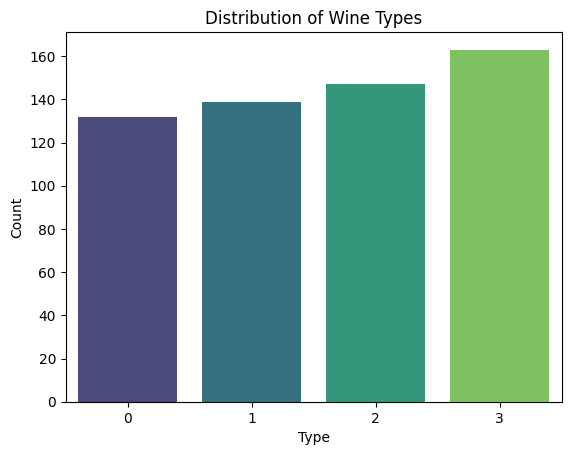

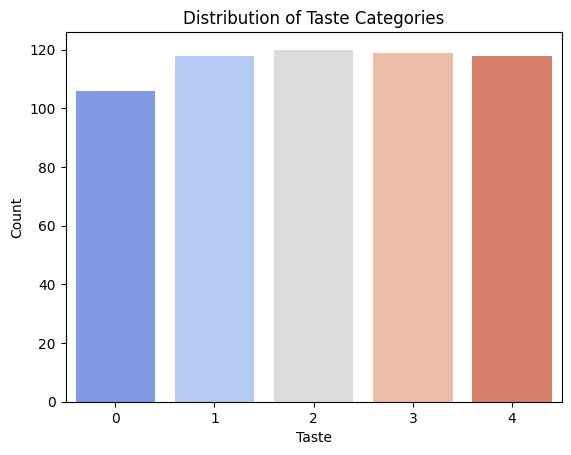

In [111]:
import warnings
warnings.filterwarnings('ignore')


# Plotting the distribution of the 'type' variable
sns.countplot(data=df, x='type', palette='viridis')
plt.title('Distribution of Wine Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

print()
# Plotting the distribution of the 'Taste' variable
sns.countplot(data=df, x='Taste', palette='coolwarm')
plt.title('Distribution of Taste Categories')
plt.xlabel('Taste')
plt.ylabel('Count')
plt.show()

### Heatmap

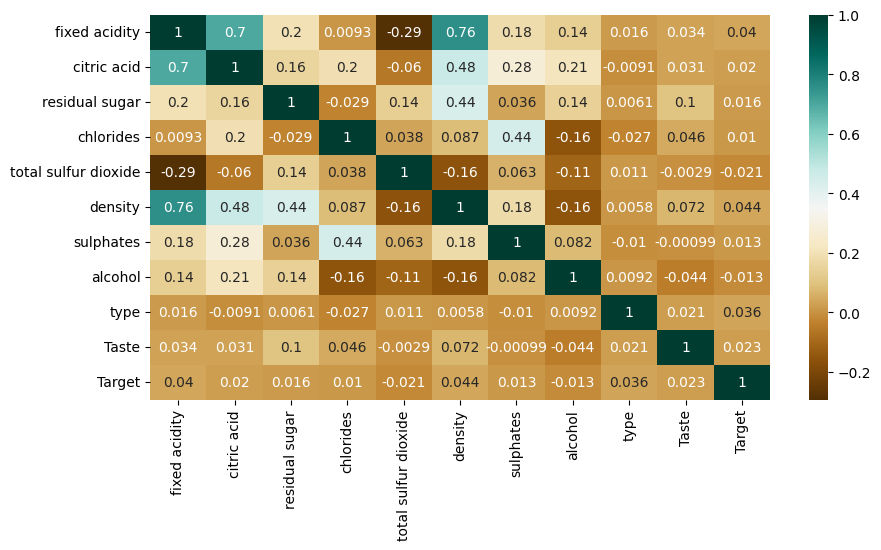

In [112]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 5))
c = numeric_df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()

### Scatterplot

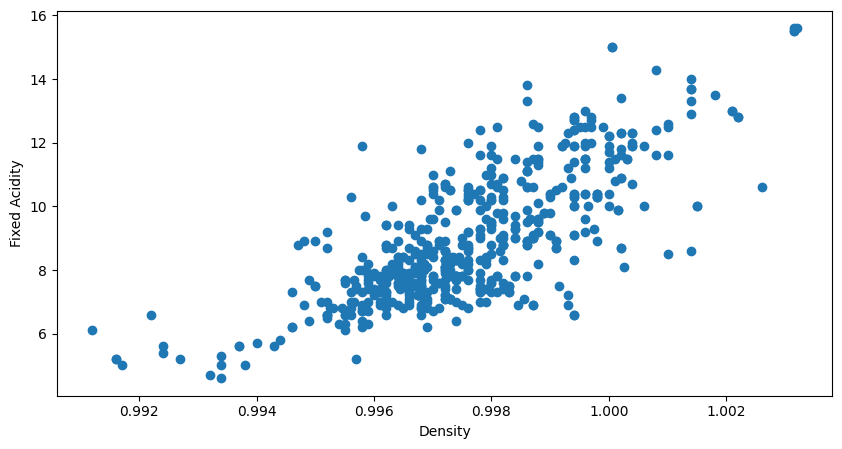

In [113]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['density'], df['fixed acidity'])
ax.set_xlabel('Density')
ax.set_ylabel('Fixed Acidity')
plt.show()

### Pairplot

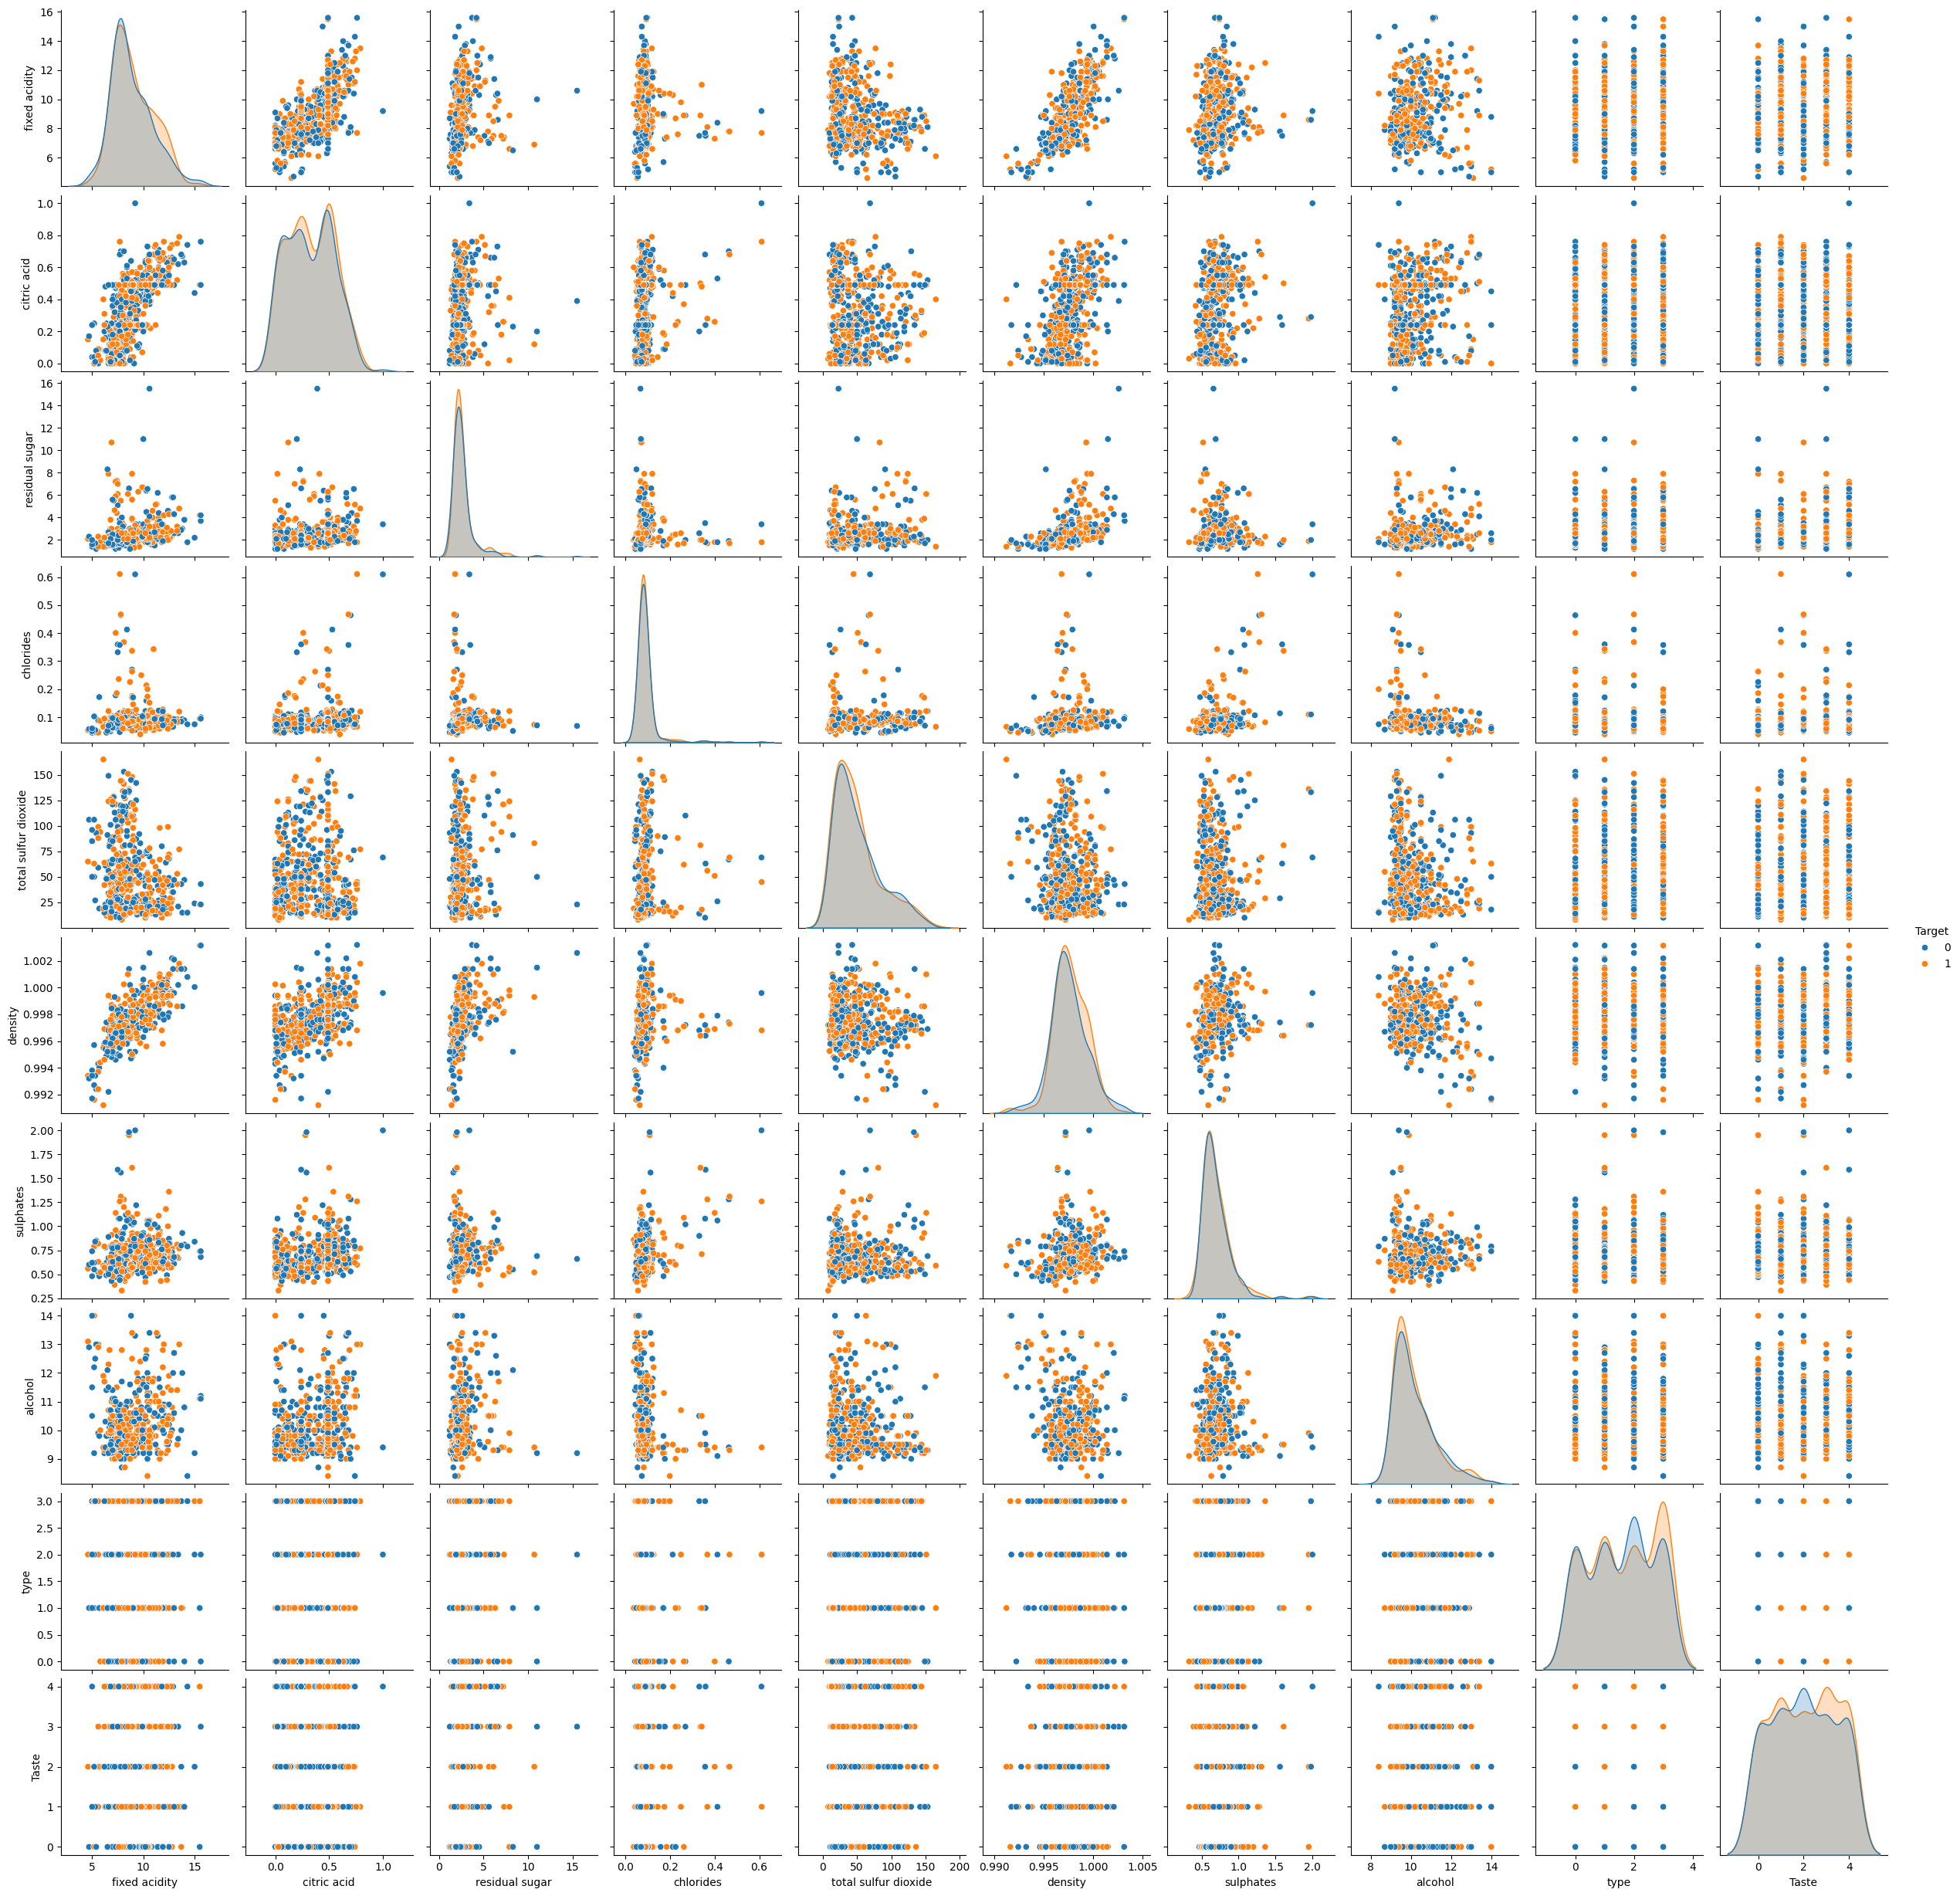

In [114]:
sns.pairplot(data=df,hue='Target')
plt.show()

## Spliting the dataset into Dependent and Independent Variables

## Train Gaussian Naïve Bayes classifier

In [115]:
x = df.drop('Target', axis=1)
y = df["Target"]

In [116]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

classifier = GaussianNB()
res=[]
for j in range(0,5000):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = j)
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    res.append(accuracy_score(Y_test, y_pred))
print(res.index(max(res)))

47


In [117]:
print("Maximum Accuracy: ",round(max(res)*100),"%")

Maximum Accuracy:  60 %


In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 47)

### Predicting the Results

In [122]:
from sklearn.metrics import classification_report

classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.30      0.37        56
           1       0.65      0.79      0.71        90

    accuracy                           0.60       146
   macro avg       0.56      0.55      0.54       146
weighted avg       0.58      0.60      0.58       146



## Creating Confusion Matrix to analyze the Model Accuracy

60 %


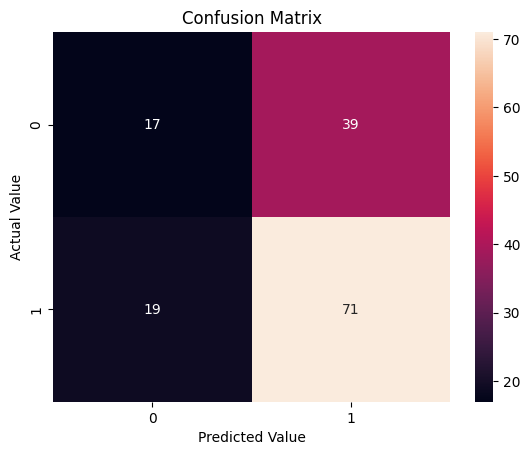

In [123]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

matrix = confusion_matrix(Y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
print(round(accuracy_score(Y_test, y_pred)*100),"%")

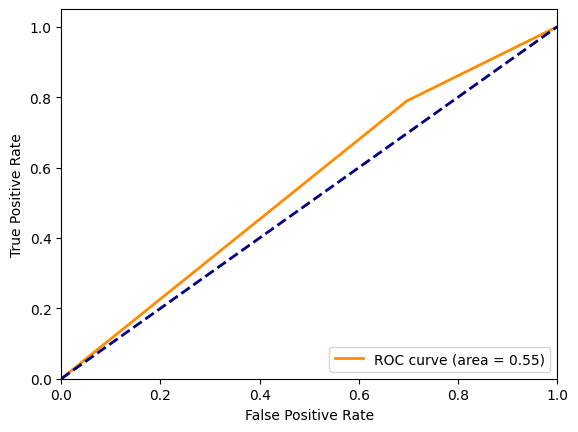

In [125]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### The ROC curve evaluates the performance of a binary classification model by plotting the True Positive Rate (sensitivity) against the False Positive Rate (1-specificity) at various thresholds. The diagonal line represents the performance of a random classifier with no predictive power, having an Area Under the Curve (AUC) of 0.5. The orange curve, which represents the model's performance, has an AUC of 0.55, indicating that the model performs only slightly better than random guessing. This low AUC suggests limited effectiveness in distinguishing between the classes, highlighting a need for improvements through better feature selection, hyperparameter tuning, or experimenting with alternative models.

### Multinomial Naïve Bayes classifier

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

res=[]
for j in range(0,1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=j)
    model = MultinomialNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    res.append(accuracy_score(Y_test, y_pred))
print(res.index(max(res)))

212


In [133]:
print("Maximum Accuracy: ",round(max(res)*100),"%")

Maximum Accuracy:  64 %


Text(50.722222222222214, 0.5, 'Actual Value')

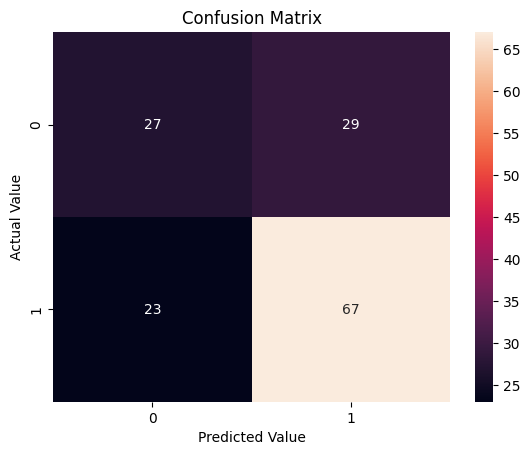

In [140]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=212)
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
matrix = confusion_matrix(Y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

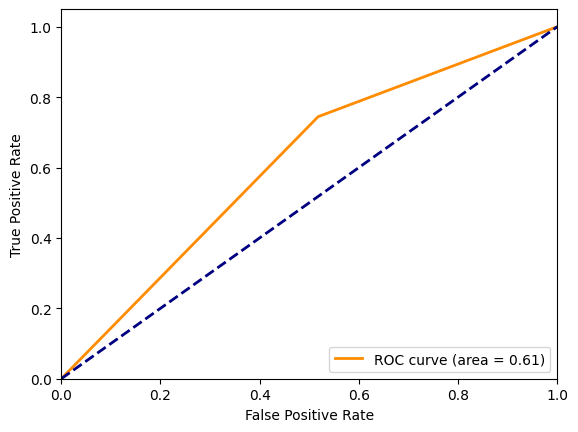

In [141]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#### The orange curve, representing the model's performance, has an AUC of 0.61. This indicates that the model performs better than random guessing, with some ability to distinguish between the two classes. However, the AUC value suggests the model’s predictive power is moderate and may benefit from improvements such as feature engineering, hyperparameter tuning, or exploring alternative models.

# -------------------------------------------------------------------------------------------